In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
import io
import scipy.fftpack
import scipy.spatial
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, leaves_list, cut_tree
import json
import sys

In [27]:
ds = [ "quantum_consciousness_hallucination/", "smartphones_society_impact/" ]

In [28]:
trs = []
for d in ds:
    trs.append(torch.load(d + "hidden_states_last.pt",map_location=torch.device('cpu')))



<ipython-input-28-bac2e5d9eb01>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trs.append(torch.load(d + "hidden_states_last.pt",map_location=torch.device('cpu')))


In [32]:
tr0 = np.concatenate((trs[0][0],trs[1][0]))
for tr in trs:
    print(tr.shape)
print(tr0.shape)

torch.Size([1, 1419, 1536])
torch.Size([1, 1482, 1536])
(2901, 1536)


In [33]:
ntr0 = (tr0.T / np.linalg.norm(tr0,axis=1)).T

In [34]:
np.dot(ntr0,ntr0[0])

array([ 0.99999994, -0.015562  ,  0.12708135, ..., -0.02697745,
        0.04256708,  0.04230859], dtype=float32)

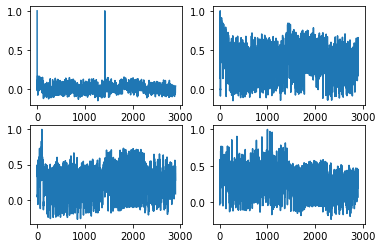

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(np.dot(ntr0,ntr0[0]))
ax2.plot(np.dot(ntr0,ntr0[10]))
ax3.plot(np.dot(ntr0,ntr0[100]))
ax4.plot(np.dot(ntr0,ntr0[1000]))
plt.show()

In [36]:
dm = cosine_distances(ntr0,ntr0)

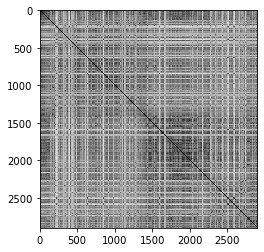

In [37]:
plt.imshow(dm,cmap='gray')

In [38]:
ll0 = linkage(ntr0,'complete','cosine')

In [39]:
order = leaves_list(ll0)

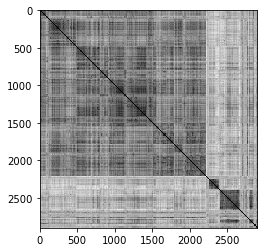

In [40]:
dm = cosine_distances(ntr0[order],ntr0[order])
plt.imshow(dm,cmap='gray')

In [63]:
tokens = []
for d in ds:
    f = open(d+"tokens.json","r")
    tokens.append(json.load(f))
    f.close()

In [64]:
t = np.concatenate((np.array(tokens[0][:-1]),np.array(tokens[1])[:-1]))

In [65]:
t[order]

array([' system', ' it', 'measurement', ..., ' Oculus', 'AR', 'VR'],
      dtype='<U21')

In [66]:
t

array(['<｜begin▁of▁sentence｜>', 'Ex', 'plain', ..., ' ethical',
       ' implications', '.'], dtype='<U21')

In [67]:
(ll0[:,2]<0.1).sum()

518

In [90]:
NC = 20
ct = cut_tree(ll0,n_clusters=NC).flatten()
for i in range(NC):
    print(t[np.where(ct==i)[0]])

['<｜begin▁of▁sentence｜>' '<｜begin▁of▁sentence｜>' ' Smart' 'Smart' 'Smart']
['Ex' 'oss' 'oss' ' Below' ' is' ' research' ' are' ' discussed' '.' '  '
 ' -' '.' '  ' '.' '  ' '.' '  ' '.' '  ' '###' 'oss' '.' ' Ex' '.' ' Ex'
 '.' '###' '.' '**' '  ' '.' '**' '  ' '.' '**' '  ' '.' '**' '  ' '.'
 '**' '  ' '###' '.' '**' '  ' '.' '**' '  ' '.' '**' '  ' '.' '**' '  '
 '###' '.' '**' '  ' '.' '**' '  ' '.' '**' '  ' '###' 'oss' '---'
 ' provides' 'oss' 'Ex' ' Con' ' Ex' ' Ex']
['plain' ' the' ' scientific' ' behind' ' the' ' quantum' ' consciousness'
 ',' ' including' ' her' ' experimental' ',' ' key' ',' ' and' ' how'
 ' her' ' Provide' ' detailed' ' and' ' from' ' her' ' published'
 ' Additionally' ' discuss' ' the' ' of' ' clarify' ',' ' user' ' is'
 ' student' ' who' ' is' ' trying' ' understand' ' and' ' needs' ' a'
 ' comprehensive' ' They' ' may' ' have' ' a' ' basic' ' but' ' may'
 ' not' ' be' ' familiar' ' user' ' is' ' looking' ' for' ' a' ' detailed'
 ',' ' including' ' all' ' 

In [79]:
c = [30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47]
NC = len(c)
c = [31,32,33,34,35,36,37,40,41,42,43,44,45,46,47]
NC =4

In [80]:
ct = cut_tree(ll0,n_clusters=NC).flatten()

In [81]:
f = open("a.txt","w")
for i in range(len(t)):
    f.write("\x1b[%dm%s\x1b[0m" % (c[ct[i]],t[i]))
f.close()

In [82]:
len(t)

2901

In [73]:
len(ct)

2901

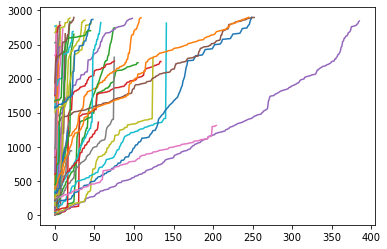

In [89]:
for i in range(NC):
    plt.plot(np.where(ct==i)[0])